In [55]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint
from matplotlib.widgets import Slider, Button
from matplotlib import interactive
%matplotlib inline    


In [83]:
def f(x):
    return 1/(1+np.cos(x)/2)**0.5

In [84]:
def Fourier_Coloc(N):
# compute 2n+1 collocation points in [O,2 pi[
     y=np.linspace(0,2*np.pi,N+1)
     return y[:-1]

In [114]:
n=6;  # degree of the truncated Fourier  serie
Nbf=2*n+1; # number of terms in the Fourier serie
Nint=13  # number of collocation points
X0= Fourier_Coloc(Nint) # collocation points xi
Y0=f(X0);            # f(xi)
Coef1=np.zeros((Nbf),dtype=complex)
for k in range(-n,n+1):
    s=0
    for m in range(Nint):
        s=s+Y0[m]*np.exp(-1j*k*X0[m])
    Coef1[k+n]=s/Nint



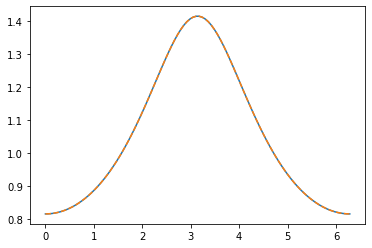

In [115]:
# abscissa plot
nbp=100
xp=np.linspace(0,2*np.pi,nbp)
yp=f(xp)  # the true function
pny=np.zeros((nbp,1),dtype=complex)  # the Fourier approximation
for m in range(nbp):
    for k in range(-n,n+1):
        pny[m]+=Coef1[k+n]*np.exp(1j*k*xp[m])
plt.plot(xp,yp,label='f')
plt.plot(xp,np.real(pny),'--',label='Real(Pnf)')
#plt.legend()


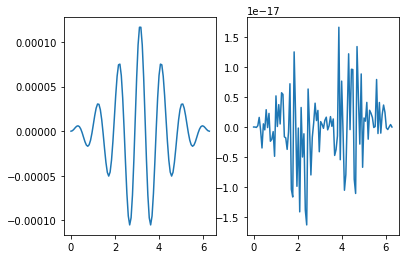

In [116]:
plt.subplot(1,2,1)
plt.plot(xp,np.reshape(yp,(nbp,1))-np.real(pny),label='f')
plt.subplot(1,2,2)
plt.plot(xp,np.imag(pny),label='imag(Pnf)')

#plt.plot(xp,np.real(pny),'--',label='Real(Pnf)')
